# **DAV 6500 CAPSTONE**

In [ ]:
# import pandas and ignore warnings

import pandas as pd 
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings("ignore")

# load results without shootouts
results = pd.read_csv("https://raw.githubusercontent.com/nananov/DAV-6500/master/results.csv")
print(results.shape)
results.head()

(43451, 9)


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [ ]:
# load ratings
ratings = pd.read_csv("https://raw.githubusercontent.com/nananov/DAV-6500/master/fifa_ranking-2021-05-27.csv")
print(ratings.shape)
ratings.head()

(63054, 9)


,id,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,43818,82,Iraq,IRQ,15,0,0,AFC,1992-12-31
1,43873,107,Mozambique,MOZ,9,0,0,CAF,1992-12-31
2,43816,108,Indonesia,IDN,9,0,0,AFC,1992-12-31
3,1882218,109,Antigua and Barbuda,ATG,8,0,0,CONCACAF,1992-12-31
4,43820,110,Jordan,JOR,8,0,0,AFC,1992-12-31


In [ ]:
# check the information of each column
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63054 entries, 0 to 63053
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               63054 non-null  int64 
 1   rank             63054 non-null  int64 
 2   country_full     63054 non-null  object
 3   country_abrv     63054 non-null  object
 4   total_points     63054 non-null  int64 
 5   previous_points  63054 non-null  int64 
 6   rank_change      63054 non-null  int64 
 7   confederation    63054 non-null  object
 8   rank_date        63054 non-null  object
dtypes: int64(5), object(4)
memory usage: 4.3+ MB


In [ ]:
# select rows by condition
ratings_1806 = ratings.loc[ratings['rank_date'] == '2018-06-07']
ratings_1806.head()

,id,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
57583,43861,68,Guinea,GUI,463,450,2,CAF,2018-06-07
57584,43854,68,Côte d'Ivoire,CIV,463,458,1,CAF,2018-06-07
57585,43965,70,Russia,RUS,457,493,4,UEFA,2018-06-07
57586,44000,71,North Macedonia,MKD,451,422,6,UEFA,2018-06-07
57587,43891,76,Zambia,ZAM,420,412,2,CAF,2018-06-07


In [ ]:
# use ratings directlyl to predict
# select rows of teams who attended wc18
ratings_18 = ratings_1806[ratings_1806['country_abrv'].isin(['RUS','KSA','EGY','URU','MAR','IRN','POR','ESP','FRA','AUS','PER','DEN','ARG',
                                                             'ISL','CRO','NGA','CRC','SRB','BRA','SUI','GER','MEX','SWE','KOR','BEL','PAN',
                                                             'TUN','ENG','COL','JPN','POL','SEN'])]
print(ratings_18.shape)
ratings_18

(32, 9)


,id,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
57585,43965,70,Russia,RUS,457,493,4,UEFA,2018-06-07
57591,43914,55,Panama,PAN,571,574,0,CONCACAF,2018-06-07
57593,43835,67,Saudi Arabia,KSA,465,462,0,AFC,2018-06-07
57598,43819,61,Japan,JPN,521,528,1,AFC,2018-06-07
57602,43822,57,Korea Republic,KOR,544,520,4,AFC,2018-06-07
57636,43901,23,Costa Rica,CRC,884,858,2,CONCACAF,2018-06-07
57637,43951,22,Iceland,ISL,908,930,0,UEFA,2018-06-07
57638,43888,21,Tunisia,TUN,910,1012,7,CAF,2018-06-07
57639,43938,20,Croatia,CRO,945,975,2,UEFA,2018-06-07
57643,43926,16,Colombia,COL,986,989,0,CONMEBOL,2018-06-07


In [ ]:
# keep only useful colomns
ratings_18 = ratings_18[['country_full', 'rank', 'total_points', 'confederation']]
ratings_18.head()

,country_full,rank,total_points,confederation
57585,Russia,70,457,UEFA
57591,Panama,55,571,CONCACAF
57593,Saudi Arabia,67,465,AFC
57598,Japan,61,521,AFC
57602,Korea Republic,57,544,AFC


In [ ]:
# get dummies for confederation
cfdr_dummies = pd.get_dummies(ratings_18.confederation, prefix='cfdr')
data_18 = pd.concat([ratings_18['country_full'], ratings_18['rank'], ratings_18['total_points'], cfdr_dummies], axis=1)
data_18 = data_18.drop('cfdr_AFC', axis=1)
data_18.head()

,country_full,rank,total_points,cfdr_CAF,cfdr_CONCACAF,cfdr_CONMEBOL,cfdr_UEFA
57585,Russia,70,457,0,0,0,1
57591,Panama,55,571,0,1,0,0
57593,Saudi Arabia,67,465,0,0,0,0
57598,Japan,61,521,0,0,0,0
57602,Korea Republic,57,544,0,0,0,0


In [ ]:
# host dummy
host = ['1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', 
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
data_18['host'] = host

In [ ]:
# 0=lose, 1=win
group_lst = ['1', '0', '0', '1', '0', '0', '0', '0', 
             '1', '1', '1', '1', '1', '1', '0', '1', 
             '0', '1', '1', '1', '1', '1', '1', '0', 
             '1', '0', '0', '0', '0', '0', '0', '0']
data_18['group_result'] = group_lst
data_18.head()

,country_full,rank,total_points,cfdr_CAF,cfdr_CONCACAF,cfdr_CONMEBOL,cfdr_UEFA,host,group_result
57585,Russia,70,457,0,0,0,1,1,1
57591,Panama,55,571,0,1,0,0,0,0
57593,Saudi Arabia,67,465,0,0,0,0,0,0
57598,Japan,61,521,0,0,0,0,0,1
57602,Korea Republic,57,544,0,0,0,0,0,0


In [ ]:
# import scikit-learn modules
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

# feature selection
feature_cols = ['total_points', 'host', 'cfdr_UEFA', 'cfdr_CAF', 'cfdr_CONCACAF', 'cfdr_CONMEBOL']
X_18 = data_18[feature_cols]
y_18 = data_18.group_result

# split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_18, y_18, test_size=0.25, random_state=1) 
# create Decision Tree classifer object
clf = DecisionTreeClassifier()
# train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
# predict the response for test dataset
y_pred = clf.predict(X_test)

# evaluate model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5


In [ ]:
from sklearn.metrics import classification_report
target_names = ['knocked out', 'win from group']
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

   knocked out       0.40      0.67      0.50         3
win from group       0.67      0.40      0.50         5

      accuracy                           0.50         8
     macro avg       0.53      0.53      0.50         8
  weighted avg       0.57      0.50      0.50         8



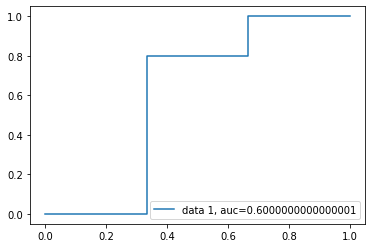

In [ ]:
# import required modules
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# set the model
logreg = LogisticRegression(random_state=16)
# fit the model with data
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
# convert y ture to numeric
y_test = y_test.astype(str).astype(int)

# roc curve and auc score
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# select rows for 2014
ratings_1406 = ratings.loc[ratings['rank_date'] == '2014-06-05']
ratings_14 = ratings_1406[ratings_1406['country_abrv'].isin(['ALG','ARG','AUS','BEL','BIH','BRA','CMR','CHI','COL','CRC','CIV','CRO','ECU',
                                                             'ENG','FRA','GER','GHA','GRE','HON','IRN','ITA','JPN','KOR','MEX','NED','NGA',
                                                             'POR','RUS','ESP','SUI','URU','USA'])]
print(ratings_14.shape)
#ratings_14

(32, 9)


In [ ]:
# keep only useful colomns
ratings_14 = ratings_14[['country_full', 'rank', 'total_points', 'confederation']]
# get dummies for confederation
cfdr_dummies = pd.get_dummies(ratings_14.confederation, prefix='cfdr')
data_14 = pd.concat([ratings_14['country_full'], ratings_14['rank'], ratings_14['total_points'], cfdr_dummies], axis=1)
data_14 = data_14.drop('cfdr_AFC', axis=1)
# host dummy
host = ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', 
        '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0']
data_14['host'] = host
# 0=lose, 1=win
group_lst = ['0', '0', '0', '1', '1', '0', '1', '0', 
             '0', '1', '1', '1', '0', '1', '0', '0', 
             '0', '1', '1', '0', '0', '0', '1', '0', 
             '0', '0', '1', '0', '0', '0', '0', '1']
data_14['group_result'] = group_lst
data_14.head()

,country_full,rank,total_points,cfdr_CAF,cfdr_CONCACAF,cfdr_CONMEBOL,cfdr_UEFA,host,group_result
47517,Cameroon,56,558,1,0,0,0,0,0
47522,Australia,62,526,0,0,0,0,0,0
47526,Korea Republic,57,547,0,0,0,0,0,0
47558,Costa Rica,28,762,0,1,0,0,0,1
47561,Algeria,22,858,1,0,0,0,0,1


In [ ]:
# select rows for 2010
ratings_1006 = ratings.loc[ratings['rank_date'] == '2010-05-26']
ratings_10 = ratings_1006[ratings_1006['country_abrv'].isin(['ALG','ARG','AUS','BRA','CMR','CHI','CIV','DEN','ENG','FRA','GER','GHA','GRE',
                                                             'HON','ITA','JPN','PRK','KOR','MEX','NED','NZL','NGA','PAR','POR','SRB','SVK',
                                                             'SVN','RSA','ESP','SUI','URU','USA'])]
print(ratings_10.shape)
#ratings_10

(32, 9)


In [ ]:
# keep only useful colomns
ratings_10 = ratings_10[['country_full', 'rank', 'total_points', 'confederation']]
# get dummies for confederation
cfdr_dummies = pd.get_dummies(ratings_10.confederation, prefix='cfdr')
data_10 = pd.concat([ratings_10['country_full'], ratings_10['rank'], ratings_10['total_points'], cfdr_dummies], axis=1)
data_10 = data_10.drop('cfdr_AFC', axis=1)
# host dummy
host = ['0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', 
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
data_10['host'] = host
# 0=lose, 1=win
group_lst = ['0', '0', '0', '0', '0', '1', '1', '1', 
             '0', '1', '0', '0', '0', '1', '1', '1', 
             '0', '1', '1', '1', '0', '0', '1', '1', 
             '0', '0', '1', '1', '1', '0', '1', '0']
data_10['group_result'] = group_lst
data_10.head()

,country_full,rank,total_points,cfdr_CAF,cfdr_CONCACAF,cfdr_CONMEBOL,cfdr_OFC,cfdr_UEFA,host,group_result
37531,New Zealand,78,410,0,0,0,1,0,0,0
37553,South Africa,83,392,1,0,0,0,0,1,0
37562,Nigeria,21,883,1,0,0,0,0,0,0
37563,Australia,20,886,0,0,0,0,0,0,0
37564,Cameroon,19,887,1,0,0,0,0,0,0


In [ ]:
# select rows for 2006
ratings_0606 = ratings.loc[ratings['rank_date'] == '2006-05-17']
ratings_06 = ratings_0606[ratings_0606['country_abrv'].isin(['ANG','ARG','AUS','BRA','CRC','CIV','CRO','CZE','ECU','ENG','FRA','GER','GHA',
                                                             'IRN','ITA','JPN','KOR','MEX','NED','PAR','POL','POR','KSA','SCG','ESP','SWE',
                                                             'SUI','TOG','TRI','TUN','UKR','USA'])]
print(ratings_06.shape)
#ratings_06

(32, 9)


In [ ]:
# keep only useful colomns
ratings_06 = ratings_06[['country_full', 'rank', 'total_points', 'confederation']]
# get dummies for confederation
cfdr_dummies = pd.get_dummies(ratings_06.confederation, prefix='cfdr')
data_06 = pd.concat([ratings_06['country_full'], ratings_06['rank'], ratings_06['total_points'], cfdr_dummies], axis=1)
data_06 = data_06.drop('cfdr_AFC', axis=1)
# host dummy
host = ['0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', 
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
data_06['host'] = host
# 0=lose, 1=win
group_lst = ['0', '0', '1', '1', '0', '1', '0', '1',
             '1', '1', '1', '1', '1', '1', '0', '1', 
             '1', '0', '0', '0', '0', '1', '0', '1', 
             '1', '1', '0', '0', '0', '0', '0', '0']
data_06['group_result'] = group_lst
data_06.head()

,country_full,rank,total_points,cfdr_CAF,cfdr_CONCACAF,cfdr_CONMEBOL,cfdr_UEFA,host,group_result
27787,Angola,57,581,1,0,0,0,0,0
27788,Togo,61,569,1,0,0,0,0,0
27826,Brazil,1,827,0,0,1,0,0,1
27827,Ghana,48,600,1,0,0,0,0,1
27828,Tunisia,21,693,1,0,0,0,0,0


In [ ]:
# select rows for 2002
ratings_0205 = ratings.loc[ratings['rank_date'] == '2002-05-15']
ratings_02 = ratings_0205[ratings_0205['country_abrv'].isin(['ARG','BEL','BRA','CMR','CHN','CRC','CRO','DEN','ECU','ENG','FRA','GER','ITA',
                                                             'JPN','KOR','MEX','NGA','PAR','POL','POR','IRL','RUS','KSA','SEN','SVN','RSA',
                                                             'ESP','SWE','TUN','TUR','URU','USA'])]
print(ratings_02.shape)
#ratings_02

(32, 9)


In [ ]:
# keep only useful colomns
ratings_02 = ratings_02[['country_full', 'rank', 'total_points', 'confederation']]
# get dummies for confederation
cfdr_dummies = pd.get_dummies(ratings_02.confederation, prefix='cfdr')
data_02 = pd.concat([ratings_02['country_full'], ratings_02['rank'], ratings_02['total_points'], cfdr_dummies], axis=1)
data_02 = data_02.drop('cfdr_AFC', axis=1)
# host dummy
host = ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', 
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0']
data_02['host'] = host
# 0=lose, 1=win
group_lst = ['0', '1', '1', '0', '1', '1', '1', '0', 
             '1', '1', '1', '1', '1', '1', '1', '0', 
             '0', '0', '0', '0', '1', '0', '0', '0', 
             '0', '1', '0', '0', '1', '1', '0', '0']
data_02['group_result'] = group_lst
data_02.head()

,country_full,rank,total_points,cfdr_CAF,cfdr_CONCACAF,cfdr_CONMEBOL,cfdr_UEFA,host,group_result
18270,Uruguay,24,652,0,0,1,0,0,0
18271,Belgium,23,653,0,0,0,1,0,1
18272,Turkey,22,654,0,0,0,1,0,1
18273,Croatia,21,655,0,0,0,1,0,0
18274,Denmark,20,657,0,0,0,1,0,1


In [ ]:
# select rows for 1998
ratings_9806 = ratings.loc[ratings['rank_date'] == '1998-05-20']
ratings_98 = ratings_9806[ratings_9806['country_abrv'].isin(['ARG','AUT','BEL','BRA','BUL','CMR','CHI','COL','CRO','DEN','ENG','FRA','GER',
                                                             'IRN','ITA','JAM','JPN','KOR','MEX','MAR','NED','NGA','NOR','PAR','ROU','KSA',
                                                             'SCO','RSA','ESP','TUN','USA','YUG'])]
print(ratings_98.shape)
#ratings_98

(32, 9)


In [ ]:
# keep only useful colomns
ratings_98 = ratings_98[['country_full', 'rank', 'total_points', 'confederation']]
# get dummies for confederation
cfdr_dummies = pd.get_dummies(ratings_98.confederation, prefix='cfdr')
data_98 = pd.concat([ratings_98['country_full'], ratings_98['rank'], ratings_98['total_points'], cfdr_dummies], axis=1)
data_98 = data_98.drop('cfdr_AFC', axis=1)
# host dummy
host = ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', 
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
data_98['host'] = host
# 0=lose, 1=win
group_lst = ['1', '1', '1', '1', '0', '1', '0', '0', 
             '1', '0', '0', '1', '1', '1', '1', '1', 
             '1', '0', '0', '0', '0', '0', '0', '0', 
             '1', '0', '0', '0', '1', '0', '1', '1']
data_98['group_result'] = group_lst
data_98.head()

,country_full,rank,total_points,cfdr_CAF,cfdr_CONCACAF,cfdr_CONMEBOL,cfdr_UEFA,host,group_result
8811,Chile,9,59,0,0,1,0,0,1
8812,Argentina,6,60,0,0,1,0,0,1
8813,Norway,7,60,0,0,0,1,0,1
8814,Yugoslavia,8,59,0,0,0,1,0,1
8815,Colombia,10,58,0,0,1,0,0,0


In [ ]:
# append 98-14 data as train
data_5 = pd.concat([data_98, data_02, data_06, data_10, data_14], ignore_index=True)
print(data_5.shape)
data_5.head()

(160, 10)


,country_full,rank,total_points,cfdr_CAF,cfdr_CONCACAF,cfdr_CONMEBOL,cfdr_UEFA,host,group_result,cfdr_OFC
0,Chile,9,59,0,0,1,0,0,1,NaN
1,Argentina,6,60,0,0,1,0,0,1,NaN
2,Norway,7,60,0,0,0,1,0,1,NaN
3,Yugoslavia,8,59,0,0,0,1,0,1,NaN
4,Colombia,10,58,0,0,1,0,0,0,NaN


In [ ]:
# import scikit-learn modules
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

# feature selection
feature_cols = ['rank', 'host', 'cfdr_UEFA', 'cfdr_CONMEBOL']
X_5 = data_5[feature_cols]
y_5 = data_5.group_result

# split dataset into training set and test set
# X_train, X_test, y_train, y_test = train_test_split(X_5, data_18, y_5, y_18, random_state=1) 
X_train = X_5
X_test = data_18[feature_cols]
y_train = y_5
y_test = y_18
# create Decision Tree classifer object
clf = DecisionTreeClassifier()
# train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
# predict the response for test dataset
y_pred = clf.predict(X_test)

# evaluate model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6875


In [ ]:
y_pred

array(['1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '1',
       '1', '0', '0', '1', '1', '1', '0', '0', '1', '1', '0', '0', '0',
       '1', '1', '0', '0', '0', '1'], dtype=object)

In [ ]:
data_18

,country_full,rank,total_points,cfdr_CAF,cfdr_CONCACAF,cfdr_CONMEBOL,cfdr_UEFA,host,group_result
57585,Russia,70,457,0,0,0,1,1,1
57591,Panama,55,571,0,1,0,0,0,0
57593,Saudi Arabia,67,465,0,0,0,0,0,0
57598,Japan,61,521,0,0,0,0,0,1
57602,Korea Republic,57,544,0,0,0,0,0,0
57636,Costa Rica,23,884,0,1,0,0,0,0
57637,Iceland,22,908,0,0,0,1,0,0
57638,Tunisia,21,910,1,0,0,0,0,0
57639,Croatia,20,945,0,0,0,1,0,1
57643,Colombia,16,986,0,0,1,0,0,1


In [ ]:
# run here

In [ ]:
X_18upper = data_18[data_18['country_full'].isin(['Russia','Saudi Arabia','Egypt','Uruguay','Morocco','IR Iran','Portugal','Spain',
                                                  'France','Australia','Peru','Denmark','Argentina','Iceland','Croatia','Nigeria'])]
X_test_upper = X_18upper[feature_cols]
#y_test_upper = ['1', '0', '0', '1']
y_pred_upper = clf.predict(X_test_upper)
y_pred_upper

array(['1', '0', '1', '1', '1', '1', '0', '0', '1', '0', '0', '1', '1',
       '0', '0', '0'], dtype=object)

In [ ]:
X_18upper

,country_full,rank,total_points,cfdr_CAF,cfdr_CONCACAF,cfdr_CONMEBOL,cfdr_UEFA,host,group_result
57585,Russia,70,457,0,0,0,1,1,1
57593,Saudi Arabia,67,465,0,0,0,0,0,0
57637,Iceland,22,908,0,0,0,1,0,0
57639,Croatia,20,945,0,0,0,1,0,1
57645,Uruguay,14,1018,0,0,1,0,0,1
57647,Denmark,12,1051,0,0,0,1,0,1
57648,Peru,11,1125,0,0,1,0,0,0
57649,Spain,10,1126,0,0,0,1,0,1
57652,France,7,1198,0,0,0,1,0,1
57654,Argentina,5,1241,0,0,1,0,0,1


In [ ]:
X_18q1 = data_18[data_18['country_full'].isin(['Russia','Saudi Arabia','Egypt','Uruguay','Morocco','IR Iran','Portugal','Spain'])]
X_test_q1 = X_18q1[feature_cols]
#y_test_upper = ['1', '0', '0', '1']
y_pred_q1 = clf.predict(X_test_q1)
y_pred_q1

array(['1', '0', '1', '0', '0', '1', '0', '0'], dtype=object)

In [ ]:

X_18a = data_18[data_18['country_full'].isin(['Russia','Saudi Arabia','Egypt','Uruguay'])]
X_test_a = X_18a[feature_cols]
y_test_a = ['1', '0', '0', '1']
y_pred_a = clf.predict(X_test_a)
y_pred_a

array(['1', '0', '1', '1'], dtype=object)

In [ ]:
X_18b = data_18[data_18['country_full'].isin(['Morocco','IR Iran','Portugal','Spain'])]
X_test_b = X_18b[feature_cols]
y_test_b = ['0', '0', '1', '1']
y_pred_b = clf.predict(X_test_b)
y_pred_b

array(['0', '0', '0', '0'], dtype=object)

In [ ]:
X_18c = data_18[data_18['country_full'].isin(['France','Australia','Peru','Denmark'])]
X_test_c = X_18c[feature_cols]
y_test_c = ['1', '0', '0', '1']
y_pred_c = clf.predict(X_test_c)
y_pred_c

array(['1', '0', '1', '0'], dtype=object)

In [ ]:
X_18d = data_18[data_18['country_full'].isin(['Argentina','Iceland','Croatia','Nigeria'])]
X_test_d = X_18d[feature_cols]
y_test_d = ['1', '0', '1', '0']
y_pred_d = clf.predict(X_test_d)
y_pred_d

array(['1', '1', '0', '1'], dtype=object)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['knocked out', 'win from group']
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

   knocked out       0.69      0.69      0.69        16
win from group       0.69      0.69      0.69        16

      accuracy                           0.69        32
     macro avg       0.69      0.69      0.69        32
  weighted avg       0.69      0.69      0.69        32



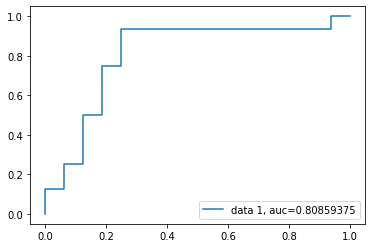

In [ ]:
# import required modules
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# set the model
logreg = LogisticRegression(random_state=16)
# fit the model with data
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
# convert y ture to numeric
y_test = y_test.astype(str).astype(int)

# roc curve and auc score
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
## run here 

In [ ]:
# import scikit-learn modules
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

# feature selection
feature_cols = ['total_points', 'host', 'cfdr_UEFA', 'cfdr_CAF', 'cfdr_CONCACAF', 'cfdr_CONMEBOL']
X_5 = data_5[feature_cols]
y_5 = data_5.group_result

# split dataset into training set and test set
# X_train, X_test, y_train, y_test = train_test_split(X_5, data_18, y_5, y_18, random_state=1) 
X_train = X_5
X_test = X_18
y_train = y_5
y_test = y_18
# create Decision Tree classifer object
clf = DecisionTreeClassifier()
# train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
# predict the response for test dataset
y_pred = clf.predict(X_test)

# evaluate model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5625


In [ ]:
target_names = ['knocked out', 'win from group']
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

   knocked out       0.55      0.69      0.61        16
win from group       0.58      0.44      0.50        16

      accuracy                           0.56        32
     macro avg       0.57      0.56      0.56        32
  weighted avg       0.57      0.56      0.56        32



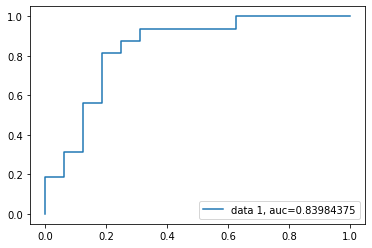

In [ ]:
# set the model
logreg = LogisticRegression(random_state=16)
# fit the model with data
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
# convert y ture to numeric
y_test = y_test.astype(str).astype(int)

# roc curve and auc score
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# import scikit-learn modules
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

# feature selection
feature_cols = ['rank', 'host', 'cfdr_UEFA', 'cfdr_CAF', 'cfdr_CONCACAF', 'cfdr_CONMEBOL']
X_5 = data_5[feature_cols]
y_5 = data_5.group_result

# split dataset into training set and test set
# X_train, X_test, y_train, y_test = train_test_split(X_5, data_18, y_5, y_18, random_state=1) 
X_train = X_5
X_test = data_18[feature_cols]
y_train = y_5
y_test = y_18
# create Decision Tree classifer object
clf = DecisionTreeClassifier()
# train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
# predict the response for test dataset
y_pred = clf.predict(X_test)

# evaluate model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.65625


In [ ]:
target_names = ['knocked out', 'win from group']
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

   knocked out       0.67      0.62      0.65        16
win from group       0.65      0.69      0.67        16

      accuracy                           0.66        32
     macro avg       0.66      0.66      0.66        32
  weighted avg       0.66      0.66      0.66        32



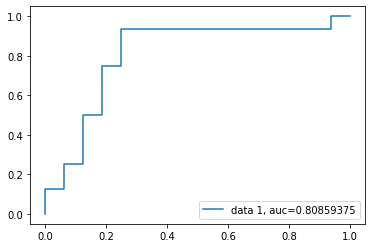

In [ ]:
# set the model
logreg = LogisticRegression(random_state=16)
# fit the model with data
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
# convert y ture to numeric
y_test = y_test.astype(str).astype(int)

# roc curve and auc score
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# append 02-14 data as train
data_4 = pd.concat([data_02, data_06, data_10, data_14], ignore_index=True)

# import scikit-learn modules
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

# feature selection
feature_cols = ['total_points', 'host', 'cfdr_UEFA', 'cfdr_CAF', 'cfdr_CONCACAF', 'cfdr_CONMEBOL']
X_4 = data_4[feature_cols]
y_4 = data_4.group_result

# split dataset into training set and test set
# X_train, X_test, y_train, y_test = train_test_split(X_5, data_18, y_5, y_18, random_state=1) 
X_train = X_4
X_test = X_18
y_train = y_4
y_test = y_18
# create Decision Tree classifer object
clf = DecisionTreeClassifier()
# train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
# predict the response for test dataset
y_pred = clf.predict(X_test)

# evaluate model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5625


In [ ]:
from sklearn.metrics import classification_report
target_names = ['knocked out', 'win from group']
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

   knocked out       0.55      0.75      0.63        16
win from group       0.60      0.38      0.46        16

      accuracy                           0.56        32
     macro avg       0.57      0.56      0.55        32
  weighted avg       0.57      0.56      0.55        32



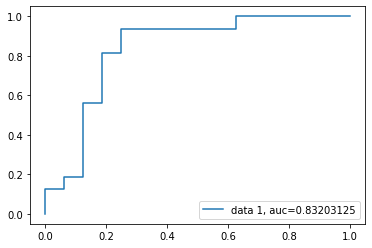

In [ ]:
# import required modules
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# set the model
logreg = LogisticRegression(random_state=16)
# fit the model with data
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
# convert y ture to numeric
y_test = y_test.astype(str).astype(int)

# roc curve and auc score
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# feature selection
feature_cols = ['rank', 'host', 'cfdr_UEFA', 'cfdr_CAF', 'cfdr_CONCACAF', 'cfdr_CONMEBOL']
X_4 = data_4[feature_cols]
y_4 = data_4.group_result

# split dataset into training set and test set
# X_train, X_test, y_train, y_test = train_test_split(X_4, data_18, y_4, y_18, random_state=1) 
X_train = X_4
X_test = data_18[feature_cols]
y_train = y_4
y_test = y_18
# create Decision Tree classifer object
clf = DecisionTreeClassifier()
# train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
# predict the response for test dataset
y_pred = clf.predict(X_test)

# evaluate model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.59375


In [ ]:
target_names = ['knocked out', 'win from group']
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

   knocked out       0.60      0.56      0.58        16
win from group       0.59      0.62      0.61        16

      accuracy                           0.59        32
     macro avg       0.59      0.59      0.59        32
  weighted avg       0.59      0.59      0.59        32



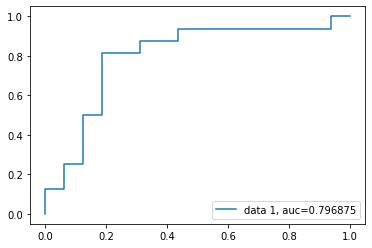

In [ ]:
# set the model
logreg = LogisticRegression(random_state=16)
# fit the model with data
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
# convert y ture to numeric
y_test = y_test.astype(str).astype(int)

# roc curve and auc score
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# append 02-14 data as train
data_3 = pd.concat([data_06, data_10, data_14], ignore_index=True)

# import scikit-learn modules
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

# feature selection
feature_cols = ['total_points', 'host', 'cfdr_UEFA', 'cfdr_CAF', 'cfdr_CONCACAF', 'cfdr_CONMEBOL']
X_3 = data_3[feature_cols]
y_3 = data_3.group_result

# split dataset into training set and test set
# X_train, X_test, y_train, y_test = train_test_split(X_5, data_18, y_5, y_18, random_state=1) 
X_train = X_3
X_test = X_18
y_train = y_3
y_test = y_18
# create Decision Tree classifer object
clf = DecisionTreeClassifier()
# train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
# predict the response for test dataset
y_pred = clf.predict(X_test)

# evaluate model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5625


In [ ]:
from sklearn.metrics import classification_report
target_names = ['knocked out', 'win from group']
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

   knocked out       0.55      0.69      0.61        16
win from group       0.58      0.44      0.50        16

      accuracy                           0.56        32
     macro avg       0.57      0.56      0.56        32
  weighted avg       0.57      0.56      0.56        32



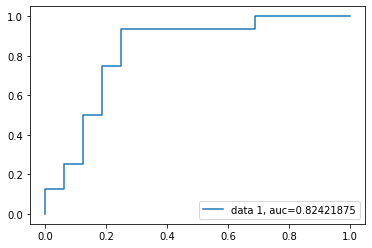

In [ ]:
# import required modules
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# set the model
logreg = LogisticRegression(random_state=16)
# fit the model with data
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
# convert y ture to numeric
y_test = y_test.astype(str).astype(int)

# roc curve and auc score
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# calculate a complete prediction for group A
# use the fifa official expected winner function and update ratings per game after

P_a1 = int(ratings_1806['total_points'][ratings_1806['country_full'] == 'Russia'])
P_a2 = int(ratings_1806['total_points'][ratings_1806['country_full'] == 'Saudi Arabia'])
diff_a1a2 = P_a1 - P_a2
Pr_a1a2 = 1 / (10**(-diff_a1a2/600) + 1)
Pr_a1a2

0.4923253191675991

In [ ]:
# WC up until QF I=50
# round the probability for a win/lose/draw result
P_a1 = P_a1 + 50*(0.5-Pr_a1a2)
P_a2 = P_a2 + 50*(0.5-(1-Pr_a1a2))

In [ ]:
P_a3 = int(ratings_1806['total_points'][ratings_1806['country_full'] == 'Egypt'])
P_a4 = int(ratings_1806['total_points'][ratings_1806['country_full'] == 'Uruguay'])
diff_a3a4 = P_a3 - P_a4
Pr_a3a4 = 1 / (10**(-diff_a3a4/600) + 1)
Pr_a3a4

0.19527530650074057

In [ ]:
P_a3 = P_a3 + 50*(0-Pr_a3a4)
P_a4 = P_a4 + 50*(1-(1-Pr_a3a4))

In [ ]:
# use updated ratings
diff_a1a3 = P_a1 - P_a3
Pr_a1a3 = 1 / (10**(-diff_a1a3/600) + 1)
Pr_a1a3

0.33228137009592407

In [ ]:
P_a1 = P_a1 + 50*(0.5-Pr_a1a3)
P_a3 = P_a3 + 50*(0.5-(1-Pr_a1a3))

In [ ]:
diff_a2a4 = P_a2 - P_a4
Pr_a2a4 = 1 / (10**(-diff_a2a4/600) + 1)
Pr_a2a4

0.10329310734733622

In [ ]:
P_a2 = P_a2 + 50*(0-Pr_a2a4)
P_a4 = P_a4 + 50*(1-(1-Pr_a2a4))

In [ ]:
diff_a1a4 = P_a1 - P_a4
Pr_a1a4 = 1 / (10**(-diff_a1a4/600) + 1)
Pr_a1a4

0.10187596318463941

In [ ]:
P_a1 = P_a1 + 50*(0-Pr_a1a4)
P_a4 = P_a4 + 50*(1-(1-Pr_a1a4))

In [ ]:
diff_a2a3 = P_a2 - P_a3
Pr_a2a3 = 1 / (10**(-diff_a2a3/600) + 1)
Pr_a2a3

0.3412414492811899

In [ ]:
P_a2 = P_a2 + 50*(0.5-Pr_a3a4)
P_a3 = P_a3 + 50*(0.5-(1-Pr_a3a4))

In [ ]:
# calculate a complete prediction for group B

P_b1 = int(ratings_1806['total_points'][ratings_1806['country_full'] == 'Morocco'])
P_b2 = int(ratings_1806['total_points'][ratings_1806['country_full'] == 'IR Iran'])
diff_b1b2 = P_b1 - P_b2
Pr_b1b2 = 1 / (10**(-diff_b1b2/600) + 1)
Pr_b1b2

0.47890549881512023

In [ ]:
P_b1 = P_b1 + 50*(0.5-Pr_b1b2)
P_b2 = P_b2 + 50*(0.5-(1-Pr_b1b2))

In [ ]:
P_b3 = int(ratings_1806['total_points'][ratings_1806['country_full'] == 'Portugal'])
P_b4 = int(ratings_1806['total_points'][ratings_1806['country_full'] == 'Spain'])
diff_b3b4 = P_b3 - P_b4
Pr_b3b4 = 1 / (10**(-diff_b3b4/600) + 1)
Pr_b3b4

0.6382948598948003

In [ ]:
P_b3 = P_b3 + 50*(0.5-Pr_b3b4)
P_b4 = P_b4 + 50*(0.5-(1-Pr_b3b4))

In [ ]:
diff_b1b3 = P_b1 - P_b3
Pr_b1b3 = 1 / (10**(-diff_b1b3/600) + 1)
Pr_b1b3

0.09744430402907361

In [ ]:
P_b1 = P_b1 + 50*(0-Pr_b1b3)
P_b3 = P_b3 + 50*(1-(1-Pr_b1b3))

In [ ]:
diff_b2b4 = P_b2 - P_b4
Pr_b2b4 = 1 / (10**(-diff_b2b4/600) + 1)
Pr_b2b4

0.16318503368639994

In [ ]:
P_b2 = P_b2 + 50*(0-Pr_b2b4)
P_b4 = P_b4 + 50*(1-(1-Pr_b2b4))

In [ ]:
diff_b1b4 = P_b1 - P_b4
Pr_b1b4 = 1 / (10**(-diff_b1b4/600) + 1)
Pr_b1b4

0.14665748759673142

In [ ]:
P_b1 = P_b1 + 50*(0-Pr_b1b4)
P_b4 = P_b1 + 50*(1-(1-Pr_b1b4))

In [ ]:
diff_b2b3 = P_b2 - P_b3
Pr_b2b3 = 1 / (10**(-diff_b2b4/600) + 1)
Pr_b2b3

0.16318503368639994

In [ ]:
P_b2 = P_b2 + 50*(0-Pr_b2b3)
P_b3 = P_b3 + 50*(1-(1-Pr_b2b3))

In [ ]:
# calculate a complete prediction for group C

P_c1 = int(ratings_1806['total_points'][ratings_1806['country_full'] == 'France'])
P_c2 = int(ratings_1806['total_points'][ratings_1806['country_full'] == 'Australia'])
diff_c1c2 = P_c1 - P_c2
Pr_c1c2 = 1 / (10**(-diff_c1c2/600) + 1)
Pr_c1c2

0.8631931113967899

In [ ]:
P_c1 = P_c1 + 50*(1-Pr_c1c2)
P_c2 = P_c2 + 50*(0-(1-Pr_c1c2))

In [ ]:
P_c3 = int(ratings_1806['total_points'][ratings_1806['country_full'] == 'Peru'])
P_c4 = int(ratings_1806['total_points'][ratings_1806['country_full'] == 'Denmark'])
diff_c3c4 = P_c3 - P_c4
Pr_c3c4 = 1 / (10**(-diff_c3c4/600) + 1)
Pr_c3c4

0.5705230490421901

In [ ]:
P_c3 = P_c3 + 50*(0.5-Pr_c3c4)
P_c4 = P_c4 + 50*(0.5-(1-Pr_c3c4))

In [ ]:
diff_c1c3 = P_c1 - P_c3
Pr_c1c3 = 1 / (10**(-diff_c1c3/600) + 1)
Pr_c1c3

0.5793073765092887

In [ ]:
P_c1 = P_c1 + 50*(0.5-Pr_c1c3)
P_c3 = P_c3 + 50*(0.5-(1-Pr_c1c3))

In [ ]:
diff_c2c4 = P_c2 - P_c4
Pr_c2c4 = 1 / (10**(-diff_c2c4/600) + 1)
Pr_c2c4

0.21119827123096666

In [ ]:
P_c2 = P_c2 + 50*(0-Pr_c2c4)
P_c4 = P_c4 + 50*(1-(1-Pr_c2c4))

In [ ]:
diff_c1c4 = P_c1 - P_c4
Pr_c1c4 = 1 / (10**(-diff_c1c4/600) + 1)
Pr_c1c4

0.6274070973877618

In [ ]:
P_c1 = P_c1 + 50*(0.5-Pr_c1c4)
P_c4 = P_c4 + 50*(0.5-(1-Pr_c1c4))

In [ ]:
diff_c2c3 = P_c2 - P_c3
Pr_c2c3 = 1 / (10**(-diff_c2c3/600) + 1)
Pr_c2c3

0.16377807416012

In [ ]:
P_c2 = P_c2 + 50*(0-Pr_c2c3)
P_c3 = P_c3 + 50*(1-(1-Pr_c2c3))

In [ ]:
# calculate a complete prediction for group D

P_d1 = int(ratings_1806['total_points'][ratings_1806['country_full'] == 'Argentina'])
P_d2 = int(ratings_1806['total_points'][ratings_1806['country_full'] == 'Iceland'])
diff_d1d2 = P_d1 - P_d2
Pr_d1d2 = 1 / (10**(-diff_d1d2/600) + 1)
Pr_d1d2

0.7820980161313187

In [ ]:
P_d1 = P_d1 + 50*(1-Pr_d1d2)
P_d2 = P_d2 + 50*(0-(1-Pr_d1d2))

In [ ]:
P_d3 = int(ratings_1806['total_points'][ratings_1806['country_full'] == 'Croatia'])
P_d4 = int(ratings_1806['total_points'][ratings_1806['country_full'] == 'Nigeria'])
diff_d3d4 = P_d3 - P_d4
Pr_d3d4 = 1 / (10**(-diff_d3d4/600) + 1)
Pr_d3d4

0.7781484542191325

In [ ]:
P_d3 = P_d3 + 50*(1-Pr_d3d4)
P_d4 = P_d4 + 50*(0-(1-Pr_d3d4))

In [ ]:
diff_d1d3 = P_d1 - P_d3
Pr_d1d3 = 1 / (10**(-diff_d1d3/600) + 1)
Pr_d1d3

0.7567943423942072

In [ ]:
P_d1 = P_d1 + 50*(1-Pr_d1d3)
P_d3 = P_d3 + 50*(0-(1-Pr_d1d3))

In [ ]:
diff_d2d4 = P_d2 - P_d4
Pr_d2d4 = 1 / (10**(-diff_d2d4/600) + 1)
Pr_d2d4

0.7528134199387274

In [ ]:
P_d2 = P_d2 + 50*(1-Pr_d2d4)
P_d4 = P_d4 + 50*(0-(1-Pr_d2d4))

In [ ]:
diff_d1d4 = P_d1 - P_d4
Pr_d1d4 = 1 / (10**(-diff_d1d4/600) + 1)
Pr_d1d4

0.9288613816009353

In [ ]:
P_d1 = P_d1 + 50*(1-Pr_d1d4)
P_d4 = P_d4 + 50*(0-(1-Pr_d1d4))

In [ ]:
diff_d2d3 = P_d2 - P_d3
Pr_d2d3 = 1 / (10**(-diff_d2d3/600) + 1)
Pr_d2d3

0.4669791115163807

In [ ]:
P_d2 = P_d2 + 50*(0.5-Pr_d2d3)
P_d3 = P_d3 + 50*(0.5-(1-Pr_d2d3))

In [ ]:
# calculate a complete prediction for group E

P_e1 = int(ratings_1806['total_points'][ratings_1806['country_full'] == 'Costa Rica'])
P_e2 = int(ratings_1806['total_points'][ratings_1806['country_full'] == 'Serbia'])
diff_e1e2 = P_e1 - P_e2
Pr_e1e2 = 1 / (10**(-diff_e1e2/600) + 1)
Pr_e1e2

0.6249017304406614

In [ ]:
P_e1 = P_e1 + 50*(0.5-Pr_e1e2)
P_e2 = P_e2 + 50*(0.5-(1-Pr_e1e2))

In [ ]:
P_e3 = int(ratings_1806['total_points'][ratings_1806['country_full'] == 'Brazil'])
P_e4 = int(ratings_1806['total_points'][ratings_1806['country_full'] == 'Switzerland'])
diff_e3e4 = P_e3 - P_e4
Pr_e3e4 = 1 / (10**(-diff_e3e4/600) + 1)
Pr_e3e4

0.7089588672038446

In [ ]:
P_e3 = P_e3 + 50*(1-Pr_e3e4)
P_e4 = P_e4 + 50*(0-(1-Pr_e3e4))

In [ ]:
diff_e1e3 = P_e1 - P_e3
Pr_e1e3 = 1 / (10**(-diff_e1e3/600) + 1)
Pr_e1e3

0.1016520221922967

In [ ]:
P_e1 = P_e1 + 50*(0-Pr_e1e3)
P_e3 = P_e3 + 50*(1-(1-Pr_e1e3))

In [ ]:
diff_e2e4 = P_e2 - P_e4
Pr_e2e4 = 1 / (10**(-diff_e2e4/600) + 1)
Pr_e2e4

0.16253970411538643

In [ ]:
P_e2 = P_e2 + 50*(0-Pr_e2e4)
P_e4 = P_e4 + 50*(1-(1-Pr_e2e4))

In [ ]:
diff_e1e4 = P_e1 - P_e4
Pr_e1e4 = 1 / (10**(-diff_e1e4/600) + 1)
Pr_e1e4

0.22658919968989635

In [ ]:
P_e1 = P_e1 + 50*(0-Pr_e1e4)
P_e4 = P_e4 + 50*(1-(1-Pr_e1e4))

In [ ]:
diff_e2e3 = P_e2 - P_e3
Pr_e2e3 = 1 / (10**(-diff_e2e3/600) + 1)
Pr_e2e3

0.06343701356950925

In [ ]:
P_e2 = P_e2 + 50*(0-Pr_e2e3)
P_e3 = P_e3 + 50*(1-(1-Pr_e2e3))

In [ ]:
# calculate a complete prediction for group F

P_f1 = int(ratings_1806['total_points'][ratings_1806['country_full'] == 'Germany'])
P_f2 = int(ratings_1806['total_points'][ratings_1806['country_full'] == 'Mexico'])
diff_f1f2 = P_f1 - P_f2
Pr_f1f2 = 1 / (10**(-diff_f1f2/600) + 1)
Pr_f1f2

0.8987687435446173

In [ ]:
P_f1 = P_f1 + 50*(1-Pr_f1f2)
P_f2 = P_f2 + 50*(0-(1-Pr_f1f2))

In [ ]:
P_f3 = int(ratings_1806['total_points'][ratings_1806['country_full'] == 'Sweden'])
P_f4 = int(ratings_1806['total_points'][ratings_1806['country_full'] == 'Korea Republic'])
diff_f3f4 = P_f3 - P_f4
Pr_f3f4 = 1 / (10**(-diff_f3f4/600) + 1)
Pr_f3f4

0.784053683887815

In [ ]:
P_f3 = P_f3 + 50*(1-Pr_f3f4)
P_f4 = P_f4 + 50*(0-(1-Pr_f3f4))

In [ ]:
diff_f1f3 = P_f1 - P_f3
Pr_f1f3 = 1 / (10**(-diff_f1f3/600) + 1)
Pr_f1f3

0.9295573361214959

In [ ]:
P_f1 = P_f1 + 50*(1-Pr_f1f3)
P_f3 = P_f3 + 50*(0-(1-Pr_f1f3))

In [ ]:
diff_f2f4 = P_f2 - P_f4
Pr_f2f4 = 1 / (10**(-diff_f2f4/600) + 1)
Pr_f2f4

0.8493820230371976

In [ ]:
P_f2 = P_f2 + 50*(1-Pr_f2f4)
P_f4 = P_f4 + 50*(0-(1-Pr_f2f4))

In [ ]:
diff_f1f4 = P_f1 - P_f4
Pr_f1f4 = 1 / (10**(-diff_f1f4/600) + 1)
Pr_f1f4

0.9819189986505334

In [ ]:
P_f1 = P_f1 + 50*(1-Pr_f1f4)
P_f4 = P_f4 + 50*(0-(1-Pr_f1f4))

In [ ]:
diff_f2f3 = P_f2 - P_f3
Pr_f2f3 = 1 / (10**(-diff_f2f3/600) + 1)
Pr_f2f3

0.5986539848717702

In [ ]:
P_f2 = P_f2 + 50*(1-Pr_f2f3)
P_f3 = P_f3 + 50*(0-(1-Pr_f2f3))

In [ ]:
# calculate a complete prediction for group G

P_g1 = int(ratings_1806['total_points'][ratings_1806['country_full'] == 'Belgium'])
P_g2 = int(ratings_1806['total_points'][ratings_1806['country_full'] == 'Panama'])
diff_g1g2 = P_g1 - P_g2
Pr_g1g2 = 1 / (10**(-diff_g1g2/600) + 1)
Pr_g1g2

0.9421311695000198

In [ ]:
P_g1 = P_g1 + 50*(1-Pr_g1g2)
P_g2 = P_g2 + 50*(0-(1-Pr_g1g2))

In [ ]:
P_g3 = int(ratings_1806['total_points'][ratings_1806['country_full'] == 'Tunisia'])
P_g4 = int(ratings_1806['total_points'][ratings_1806['country_full'] == 'England'])
diff_g3g4 = P_g3 - P_g4
Pr_g3g4 = 1 / (10**(-diff_g3g4/600) + 1)
Pr_g3g4

0.3679299878999264

In [ ]:
P_g3 = P_g3 + 50*(0.5-Pr_g3g4)
P_g4 = P_g4 + 50*(0-(0.5-Pr_g3g4))

In [ ]:
diff_g1g3 = P_g1 - P_g3
Pr_g1g3 = 1 / (10**(-diff_g1g3/600) + 1)
Pr_g1g3

0.8137808880615515

In [ ]:
P_g1 = P_g1 + 50*(1-Pr_g1g3)
P_g3 = P_g3 + 50*(0-(1-Pr_g1g3))

In [ ]:
diff_g2g4 = P_g2 - P_g4
Pr_g2g4 = 1 / (10**(-diff_g2g4/600) + 1)
Pr_g2g4

0.13849696146205817

In [ ]:
P_g2 = P_g2 + 50*(0-Pr_g2g4)
P_g4 = P_g4 + 50*(1-(1-Pr_g2g4))

In [ ]:
diff_g1g4 = P_g1 - P_g4
Pr_g1g4 = 1 / (10**(-diff_g1g4/600) + 1)
Pr_g1g4

0.7297787658035695

In [ ]:
P_g1 = P_g1 + 50*(1-Pr_g1g4)
P_g4 = P_g4 + 50*(0-(1-Pr_g2g4))

In [ ]:
diff_g2g3 = P_g2 - P_g3
Pr_g2g3 = 1 / (10**(-diff_g2g3/600) + 1)
Pr_g2g3

0.20944908012618263

In [ ]:
P_g2 = P_g2 + 50*(0-Pr_g2g3)
P_g3 = P_g3 + 50*(1-(1-Pr_g2g3))

In [ ]:
# calculate a complete prediction for group H

P_h1 = int(ratings_1806['total_points'][ratings_1806['country_full'] == 'Colombia'])
P_h2 = int(ratings_1806['total_points'][ratings_1806['country_full'] == 'Japan'])
diff_h1h2 = P_h1 - P_h2
Pr_h1h2 = 1 / (10**(-diff_h1h2/600) + 1)
Pr_h1h2

0.8562520600981506

In [ ]:
P_h1 = P_h1 + 50*(1-Pr_h1h2)
P_h2 = P_h2 + 50*(0-(1-Pr_h1h2))

In [ ]:
P_h3 = int(ratings_1806['total_points'][ratings_1806['country_full'] == 'Poland'])
P_h4 = int(ratings_1806['total_points'][ratings_1806['country_full'] == 'Senegal'])
diff_h3h4 = P_h3 - P_h4
Pr_h3h4 = 1 / (10**(-diff_h3h4/600) + 1)
Pr_h3h4

0.7898441797581306

In [ ]:
P_h3 = P_h3 + 50*(1-Pr_h3h4)
P_h4 = P_h4 + 50*(0-(1-Pr_h3h4))

In [ ]:
diff_h1h3 = P_h1 - P_h3
Pr_h1h3 = 1 / (10**(-diff_h1h3/600) + 1)
Pr_h1h3

0.31674785394472227

In [ ]:
P_h1 = P_h1 + 50*(0-Pr_h1h3)
P_h3 = P_h3 + 50*(1-(1-Pr_h1h3))

In [ ]:
diff_h2h4 = P_h2 - P_h4
Pr_h2h4 = 1 / (10**(-diff_h2h4/600) + 1)
Pr_h2h4

0.23080168736169407

In [ ]:
P_h2 = P_h2 + 50*(0-Pr_h2h4)
P_h4 = P_h4 + 50*(1-(1-Pr_h2h4))

In [ ]:
diff_h1h4 = P_h1 - P_h4
Pr_h1h4 = 1 / (10**(-diff_h1h4/600) + 1)
Pr_h1h4

0.6296729053937881

In [ ]:
P_h1 = P_h1 + 50*(0-Pr_h1h4)
P_h4 = P_h4 + 50*(1-(1-Pr_h1h4))

In [ ]:
diff_h2h3 = P_h2 - P_h3
Pr_h2h3 = 1 / (10**(-diff_h2h3/600) + 1)
Pr_h2h3

0.06218192425418284

In [ ]:
P_h2 = P_h2 + 50*(0-Pr_h2h3)
P_h3 = P_h3 + 50*(1-(1-Pr_h2h3))

In [ ]:
a_true = [1, 0, 1, 0, 0, 1]
a_pred = [0.5, 0, 0.5, 0, 0, 0.5]

In [ ]:
b_true = [0, 0.5, 0, 0, 0.5, 0.5]
b_pred = [0.5, 0.5, 0, 0, 0, 0]

In [ ]:
c_true = [1, 0, 1, 0.5, 0.5, 0]
c_pred = [1, 0.5, 0.5, 0, 0.5, 0]

In [ ]:
d_true = [0.5, 1, 0, 0, 1, 0]
d_pred = [1, 1, 1, 1, 1, 0.5]

In [ ]:
e_true = [0, 0.5, 0, 0, 0.5, 0]
e_pred = [0.5, 1, 0, 0, 0, 0]

In [ ]:
f_true = [0, 1, 1, 1, 0, 0]
f_pred = [1, 1, 1, 1, 1, 0.5]

In [ ]:
g_true = [1, 0, 1, 0, 1, 0]
g_pred = [1, 0.5, 1, 0, 1, 0]

In [ ]:
h_true = [0, 0, 0.5, 1, 1, 0]
h_pred = [1, 1, 0, 0, 0, 0]

In [ ]:
# build a linear regression model for group stage prediction

true_18 = [1, 0, 1, 0, 0, 1, 0, 0.5, 0, 0, 0.5, 0.5, 1, 0, 1, 0.5, 0.5, 0, 0.5, 1, 0, 0, 1, 0, 0, 0.5, 0, 0, 0.5, 0, 0, 1, 1, 1, 0, 0, 
           1, 0, 1, 0, 1, 0, 0, 0, 0.5, 1, 1, 0]
pred_18 = [0.5, 0, 0.5, 0, 0, 0.5, 0.5, 0.5, 0, 0, 0, 0, 1, 0.5, 0.5, 0, 0.5, 0, 1, 1, 1, 1, 1, 0.5, 0.5, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0.5, 
           1, 0.5, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0]
# dummy: host country attended is 1
host_18 = [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
           0, 0, 0, 0, 0, 0]
# dummy: asia, europa, africa, mid-north america, south america
afc_18 = [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 
           1, 0, 0, 1, 0, 1]
uefa_18 = [1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 
           0, 1, 1, 0, 0, 1]
caf_18 = [0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 
           0, 1, 0, 1, 1, 0]
concacaf_18 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 
           0, 0, 0, 0, 0, 0]
conmebol_18 = [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
           1, 0, 1, 0, 1, 0]

from statsmodels.formula.api import ols
dict = {'true_18': true_18, 'pred_18': pred_18, 'host_18': host_18, 'afc_18': afc_18, 'uefa_18': uefa_18, 'caf_18': caf_18, 
        'concacaf_18': concacaf_18, 'conmebol_18': conmebol_18} 
data_18 = pd.DataFrame(dict)
data_18.head()

,true_18,pred_18,host_18,afc_18,uefa_18,caf_18,concacaf_18,conmebol_18
0,1.0,0.5,1,0,1,0,0,0
1,0.0,0.0,0,0,0,1,0,1
2,1.0,0.5,1,0,1,1,0,0
3,0.0,0.0,0,0,0,0,0,1
4,0.0,0.0,1,0,1,0,0,1


In [ ]:
# convert w/l/d to dummy
data_18['result'] = data_18.true_18.map({0:0, 1:1, 0.5:2})
pred_dummies = pd.get_dummies(data_18.pred_18, prefix='pred')
data_18 = pd.concat([data_18, pred_dummies], axis=1)
data_18 = data_18.drop('pred_0.5', axis=1)
data_18.head()

,true_18,pred_18,host_18,afc_18,uefa_18,caf_18,concacaf_18,conmebol_18,result,pred_0.0,pred_1.0
0,1.0,0.5,1,0,1,0,0,0,1,0,0
1,0.0,0.0,0,0,0,1,0,1,0,1,0
2,1.0,0.5,1,0,1,1,0,0,1,0,0
3,0.0,0.0,0,0,0,0,0,1,0,1,0
4,0.0,0.0,1,0,1,0,0,1,0,1,0


In [ ]:
# delete a dummy col
data_18 = data_18.drop('afc_18', axis=1)
data_18.head()

,true_18,pred_18,host_18,uefa_18,caf_18,concacaf_18,conmebol_18,result,pred_0.0,pred_1.0
0,1.0,0.5,1,1,0,0,0,1,0,0
1,0.0,0.0,0,0,1,0,1,0,1,0
2,1.0,0.5,1,1,1,0,0,1,0,0
3,0.0,0.0,0,0,0,0,1,0,1,0
4,0.0,0.0,1,1,0,0,1,0,1,0


In [ ]:
# feature selection
feature_cols = ['pred_0.0', 'pred_1.0', 'host_18', 'uefa_18', 'caf_18', 'concacaf_18', 'conmebol_18']
X_18 = data_18[feature_cols]
y_18 = data_18.result

# split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_18, y_18, test_size=0.5, random_state=1) 
# create Decision Tree classifer object
clf = DecisionTreeClassifier()
# train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
# predict the response for test dataset
y_pred = clf.predict(X_test)

# evaluate model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.375
